# Credit Card Fraud

## This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud. Data set from https://app.datacamp.com/workspace 




In [2]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

importing our data

In [4]:
df = pd.read_csv('credict_card_data.csv')

In [5]:
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01 06:20:49,Hudson-Ratke,grocery_pos,199.55,Littleton,CO,39.5994,-105.0044,320420,Water engineer,1975-07-31,a5c13edd756f36c026630d13672974bd,38.619691,-105.498059,0
96,2019-01-01 06:24:47,Harber Inc,gas_transport,94.48,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,c9235f76ecb45e67372d79ecac2ffb37,49.513555,-117.819653,0
97,2019-01-01 06:25:07,Berge LLC,gas_transport,79.39,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,606b05a976ee2bca7323d6afc85e63ce,43.673602,-116.406060,0
98,2019-01-01 06:25:40,Pagac LLC,shopping_pos,5.05,Powell Butte,OR,44.2415,-121.0113,2016,Local government officer,1953-12-25,d44f496e9daab912914ac9513b038df2,44.245679,-121.333658,0


In [11]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [21]:
df['is_fraud']

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: is_fraud, Length: 100, dtype: int64

# unsupervised Learning.....
unsupervised learning was chosen because the target column('is_fraud) contains only one variable in all rows

In [22]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
print(df.head())  # Display the first few rows of the dataset
print(df.info())

  trans_date_trans_time                     merchant       category     amt  \
0   2019-01-01 00:00:44  "Heller, Gutmann and Zieme"    grocery_pos  107.23   
1   2019-01-01 00:00:51               Lind-Buckridge  entertainment  220.11   
2   2019-01-01 00:07:27                    Kiehn Inc    grocery_pos   96.29   
3   2019-01-01 00:09:03                  Beier-Hyatt   shopping_pos    7.77   
4   2019-01-01 00:21:32                   Bruen-Yost       misc_pos    6.85   

                       city state      lat      long  city_pop  \
0                    Orient    WA  48.8878 -118.2105       149   
1                Malad City    ID  42.1808 -112.2620      4154   
2                   Grenada    CA  41.6125 -122.5258       589   
3  High Rolls Mountain Park    NM  32.9396 -105.8189       899   
4                   Freedom    WY  43.0172 -111.0292       471   

                                 job         dob  \
0  Special educational needs teacher  1978-06-21   
1        Nature conserva

In [27]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]


In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


In [29]:
# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)


In [30]:
scaled_df = pd.concat([scaled_df, df.drop(columns=numeric_columns)], axis=1)

In [31]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Specify the number of components you want to reduce to
pca_data = pca.fit_transform(scaled_data)


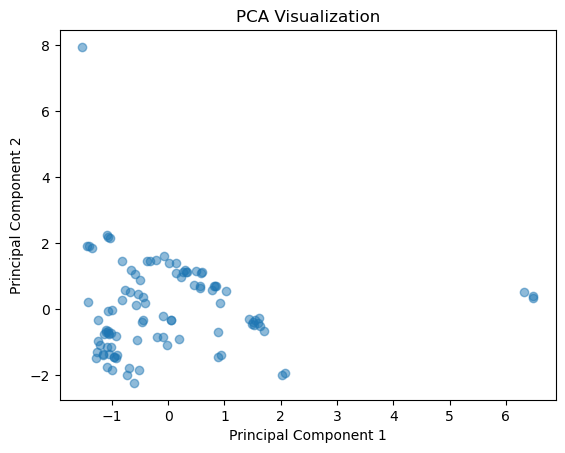

In [32]:
# Visualization
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [33]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2)  # Specify the number of clusters you want
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_


C:\Users\ADDIS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADDIS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6351155877102791


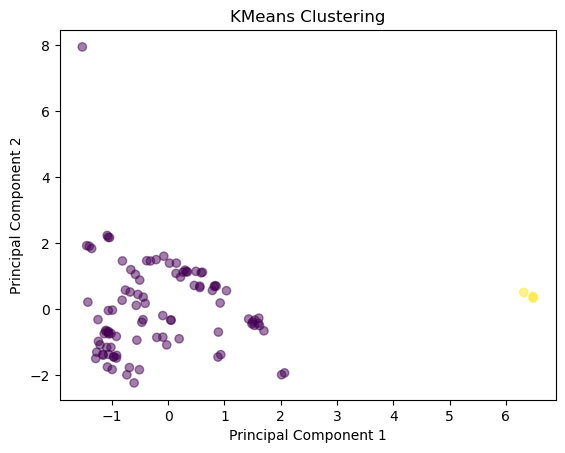

In [35]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

DBSCAN is a density-based clustering algorithm that groups together closely packed points based on a threshold for the maximum distance between points (epsilon) and the minimum number of points required to form a dense region (min_samples).
It's effective for datasets with irregular shapes and varying densities.

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
epsilon = 0.5  # Distance threshold for considering two points as neighbors
min_samples = 5  # Minimum number of points in a neighborhood for a point to be considered a core point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

In [38]:
# Fit DBSCAN to the scaled data
dbscan.fit(scaled_data)


DBSCAN()

In [39]:
# Get cluster labels
dbscan_labels = dbscan.labels_


In [40]:
print("Cluster Labels:", dbscan_labels)


Cluster Labels: [-1 -1  1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0
  0  0  1  1  1  0 -1 -1  0 -1  0 -1 -1  1 -1 -1 -1 -1 -1  1 -1  0 -1 -1
 -1 -1  0 -1  1 -1  0 -1 -1  1  0 -1 -1  0  0  0 -1  0  0  1 -1 -1  0  1
 -1 -1  1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1  0]


In [41]:
# Analyze the number of clusters and noise points
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Exclude noise points (label -1)
num_noise_points = list(dbscan_labels).count(-1)  # Count the number of noise points


In [42]:
print("Number of Clusters:", num_clusters)
print("Number of Noise Points:", num_noise_points)

Number of Clusters: 2
Number of Noise Points: 64


### Number of Clusters: 2 clusters have been identified in the dataset. These clusters represent distinct groups of data points that exhibit similar characteristics according to the DBSCAN algorithm.

Number of Noise Points: There are 64 data points classified as noise by the DBSCAN algorithm. Noise points are data points that do not belong to any cluster and are not considered part of any meaningful grouping according to the DBSCAN algorithm.

# Scatter plot showing the results of  the Unsupervised algorithm cluster 

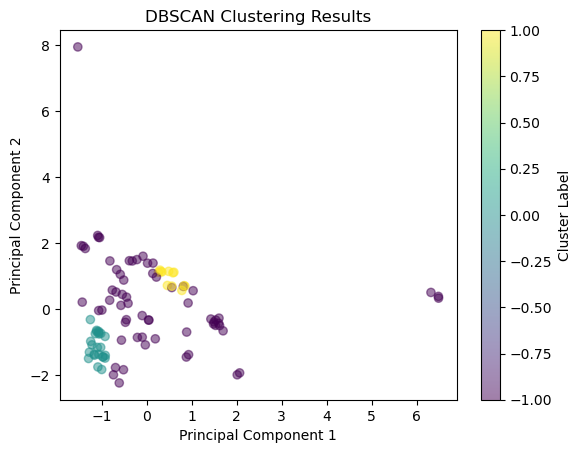

In [43]:
import matplotlib.pyplot as plt

# Plot data points colored by cluster labels
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()


# Bar chart showing 
## Cluster Noise (red)
## True Clusters(blue) 

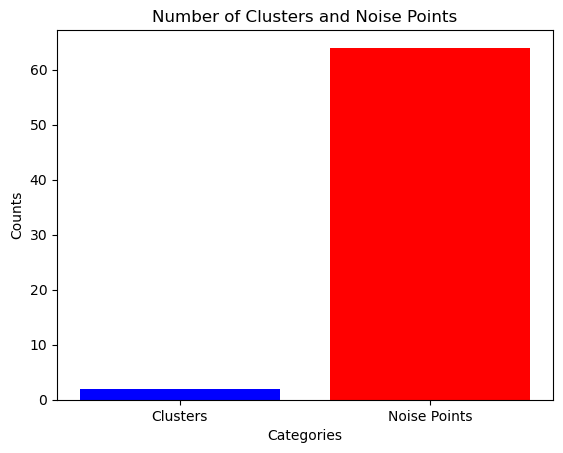

In [44]:
labels = ['Clusters', 'Noise Points']
counts = [num_clusters, num_noise_points]

# Create bar plot
plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Number of Clusters and Noise Points')
plt.show()

#  Bar chart showing 
### Cluster 0
### Cluster 1 

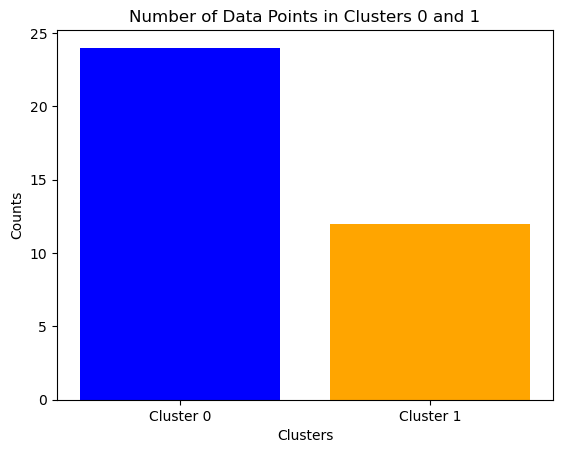

In [45]:
cluster_0_count = sum(label == 0 for label in dbscan_labels)
cluster_1_count = sum(label == 1 for label in dbscan_labels)

# Data
labels = ['Cluster 0', 'Cluster 1']
counts = [cluster_0_count, cluster_1_count]

# Create bar plot
plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.title('Number of Data Points in Clusters 0 and 1')
plt.show()

# Total of
### Cluster  0
### Cluster 1

In [46]:
cluster_0_count = sum(label == 0 for label in dbscan_labels)
cluster_1_count = sum(label == 1 for label in dbscan_labels)

# Print counts
print("Number of data points in Cluster 0:", cluster_0_count)
print("Number of data points in Cluster 1:", cluster_1_count)

Number of data points in Cluster 0: 24
Number of data points in Cluster 1: 12


# Showing the Rows labelled as 0 & 1

In [47]:
# Get the indices of rows corresponding to cluster 0 and cluster 1
cluster_0_indices = [i for i, label in enumerate(dbscan_labels) if label == 0]
cluster_1_indices = [i for i, label in enumerate(dbscan_labels) if label == 1]

# Get the actual rows from your dataset based on the indices
cluster_0_data = df.iloc[cluster_0_indices]
cluster_1_data = df.iloc[cluster_1_indices]

# Print the rows
print("Rows in Cluster 0:")
print(cluster_0_data)

print("\nRows in Cluster 1:")
print(cluster_1_data)


Rows in Cluster 0:
   trans_date_trans_time                          merchant       category  \
6    2019-01-01 00:22:18       "Nitzsche, Kessler and Wol"   shopping_pos   
13   2019-01-01 00:49:25       "Little, Gutmann and Lynch"   shopping_net   
17   2019-01-01 01:02:16                          Wolf Inc    grocery_pos   
23   2019-01-01 01:23:17                       Kerluke Inc       misc_net   
24   2019-01-01 01:23:50                       Bauch-Rayno    grocery_pos   
25   2019-01-01 01:34:25                       Hills-Olson    grocery_net   
29   2019-01-01 02:06:56                       Bradtke PLC    grocery_pos   
32   2019-01-01 02:12:07   "Bernhard, Grant and Langworth"   shopping_pos   
34   2019-01-01 02:13:16                        Harber Inc  gas_transport   
45   2019-01-01 02:42:25    "Kutch, Hermiston and Farrell"  gas_transport   
50   2019-01-01 03:01:34     "Bins, Balistreri and Beatty"   shopping_pos   
54   2019-01-01 03:12:23                         Bins-Ric

# Showing rows Labelled as 'Noise'

In [48]:
noise_indices = [i for i, label in enumerate(dbscan_labels) if label == -1]

# Get the actual rows from your dataset based on the indices
noise_data = df.iloc[noise_indices]

# Print the rows labeled as noise
print("Rows labeled as Noise:")
print(noise_data)

Rows labeled as Noise:
   trans_date_trans_time                     merchant       category     amt  \
0    2019-01-01 00:00:44  "Heller, Gutmann and Zieme"    grocery_pos  107.23   
1    2019-01-01 00:00:51               Lind-Buckridge  entertainment  220.11   
3    2019-01-01 00:09:03                  Beier-Hyatt   shopping_pos    7.77   
4    2019-01-01 00:21:32                   Bruen-Yost       misc_pos    6.85   
5    2019-01-01 00:22:06                    Kunze Inc    grocery_pos   90.22   
..                   ...                          ...            ...     ...   
94   2019-01-01 06:15:18                Pacocha-Bauch   shopping_pos    1.95   
95   2019-01-01 06:20:49                 Hudson-Ratke    grocery_pos  199.55   
96   2019-01-01 06:24:47                   Harber Inc  gas_transport   94.48   
97   2019-01-01 06:25:07                    Berge LLC  gas_transport   79.39   
98   2019-01-01 06:25:40                    Pagac LLC   shopping_pos    5.05   

                